In [1]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from rasterio.plot import show
import pandas as pd
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
import matplotlib.colors as mplc
from matplotlib import cm
import matplotlib.patches as mpatches
import json 
import pickle

from utils import legends 

In [2]:
region_name = "Elbe-Elster"

resampled = '_resampled'
 
landcover_source = 'copernicus_global_coll3' #copernicus_global_coll3  Corine_Europe_2012

colors_dict = getattr(legends, 'colors_dict_' + landcover_source)
legend_dict = getattr(legends, 'legend_dict_' + landcover_source)

# Get path to this file and then also path to data
dirname = os.getcwd()
data_path = os.path.join(dirname,'data', region_name)
with open(os.path.join(data_path, region_name+'_EPSG.pkl'), 'rb') as file:
        EPSG = pickle.load(file)

####
#EPSG=3035
####

print(f'EPSG {EPSG}')

landcoverRasterPath = os.path.join(data_path, f'landcover_{region_name}_EPSG{EPSG}.tif')


EPSG 32633


In [3]:
colors_dict

{255: (40, 40, 40),
 111: (88, 72, 31),
 113: (112, 102, 62),
 112: (0, 153, 0),
 114: (0, 204, 0),
 115: (78, 117, 31),
 116: (0, 120, 0),
 121: (102, 96, 0),
 123: (141, 116, 0),
 122: (141, 180, 0),
 124: (160, 220, 0),
 125: (146, 153, 0),
 126: (100, 140, 0),
 20: (255, 187, 34),
 30: (255, 255, 76),
 90: (0, 150, 160),
 100: (250, 230, 160),
 60: (180, 180, 180),
 40: (240, 150, 255),
 50: (255, 0, 0),
 70: (240, 240, 240),
 80: (0, 50, 200),
 200: (0, 0, 128)}

In [10]:
with rasterio.open(landcoverRasterPath) as src:
    shade = src.read(1)
    meta = src.meta

with rasterio.open('colormap.tif', 'w', **meta) as dst:
    dst.write(shade, indexes=1)
    dst.write_colormap(
        1, colors_dict)

    cmap = dst.colormap(1)




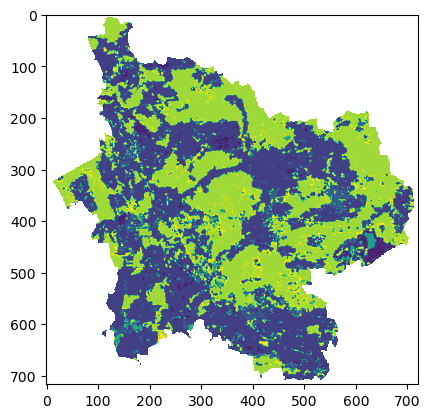

<Axes: >

In [11]:
show(band)

In [3]:
#inspect land cover data
landcover = rasterio.open(landcoverRasterPath) 

band = landcover.read(1, masked=True) #masked=True is masking no data values
print(f'landcover EPSG: {landcover.crs}')
print(f'bands (number of layers): {landcover.count}')

print(f'band shape: {band.shape}')
print(f'number of Pixels: {(band.shape[0]*band.shape[1])/1000} thousands')
res = landcover.transform[0] #pixel size
#save pixel size
with open(os.path.join(data_path, f'pixel_size_{region_name}_{EPSG}.json'), 'w') as fp:
    json.dump(res, fp)

#save landcover transform
with open(os.path.join(data_path, f'transform_landcover_{region_name}_{EPSG}.json'), 'w') as f:
    json.dump(landcover.transform, f)

print(f'pixel size: {res}')

print(landcover.tags(1))

band

landcover EPSG: EPSG:32633
bands (number of layers): 1
band shape: (717, 721)
number of Pixels: 516.957 thousands
pixel size: 82.3505638195615
{'STATISTICS_APPROXIMATE': 'YES', 'STATISTICS_MAXIMUM': '126', 'STATISTICS_MEAN': '72.518758387304', 'STATISTICS_MINIMUM': '30', 'STATISTICS_STDDEV': '36.898149097237', 'STATISTICS_VALID_PERCENT': '48.02'}


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=255,
  dtype=uint8)

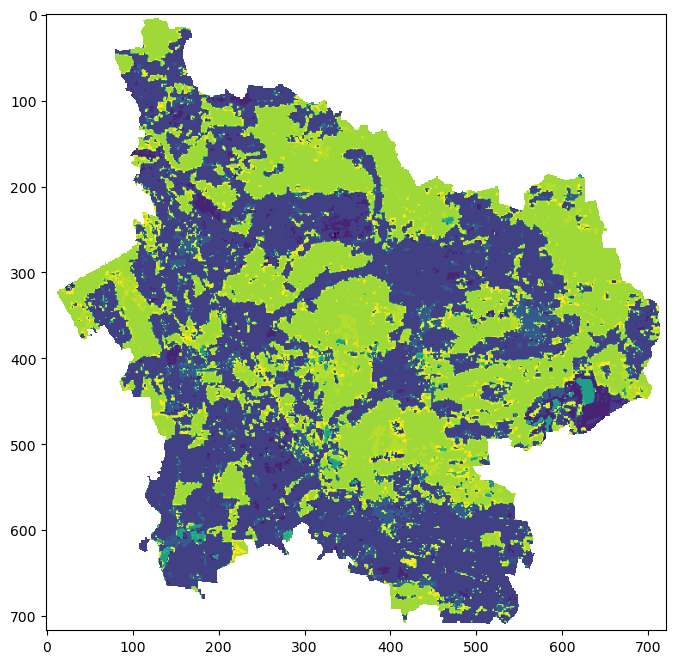

<Axes: >

In [5]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
show(band) #, cmap=landcover_cmap, vmin=20, vmax=len(colors))

#be careful with the coloring, it is not necessarily correct